In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats
from config import apiKey
from config import secret

In [2]:
file_one = Path("../Resources/adoption.csv")
adoption_df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [3]:
adoption_df.head()

,Animal_ID,type,breed,location,color,size,date_posted,name,status,gender
0,0,Cat,Domestic Short Hair,Woodmere,Orange & White,Medium,2024-02-09T01:22:49+0000,CJ,adoptable,Male
1,1,Cat,Domestic Short Hair,New York,Gray & White,Small,2024-02-09T01:15:51+0000,Ron and Harry,adoptable,Female
2,2,Cat,Domestic Short Hair,Trexlertown,NaN,Medium,2024-02-09T01:13:49+0000,Luna,adoptable,Female
3,3,Cat,Domestic Medium Hair,Pittstown,White,Large,2024-02-09T01:08:33+0000,Sweet pea,adoptable,Male
4,4,Cat,Domestic Short Hair,Mount Holly,NaN,Small,2024-02-09T01:06:28+0000,Robinson,adoptable,Female


In [4]:
major_cities_df = adoption_df.loc[(adoption_df["location"] == "New York") |
                                  (adoption_df["location"] == "Los Angeles") |
                                  (adoption_df["location"] == "Houston") |
                                  (adoption_df["location"] == "Phoenix") |
                                  (adoption_df["location"] == "Chicago")]

major_cities_df.head()

,Animal_ID,type,breed,location,color,size,date_posted,name,status,gender
1,1,Cat,Domestic Short Hair,New York,Gray & White,Small,2024-02-09T01:15:51+0000,Ron and Harry,adoptable,Female
35,35,Cat,Domestic Short Hair,New York,White,Medium,2024-02-08T22:35:07+0000,Gucci,adoptable,Male
36,36,Cat,Domestic Short Hair,New York,Gray / Blue / Silver,Medium,2024-02-08T22:35:07+0000,Celeste,adoptable,Female
51,51,Cat,Domestic Short Hair,New York,NaN,Medium,2024-02-08T21:08:43+0000,Smoke Bonz,adoptable,Female
53,53,Cat,Domestic Short Hair,New York,Brown / Chocolate,Medium,2024-02-08T20:50:08+0000,Gator,adoptable,Male


In [5]:
cats_df = major_cities_df.loc[major_cities_df["type"] == "Cat"]
dogs_df = major_cities_df.loc[major_cities_df["type"] == "Dog"]
print(len(cats_df))
print(len(dogs_df))
total_pets = len(cats_df) + len(dogs_df)

4226
5868


In [6]:
NYCats = len(cats_df.loc[cats_df["location"] == "New York"])
NYCatsPercent = round(100 * NYCats / total_pets, 1)
LACats = len(cats_df.loc[cats_df["location"] == "Los Angeles"])
LACatsPercent = round(100 * LACats / total_pets, 1)
HoustonCats = len(cats_df.loc[cats_df["location"] == "Houston"])
HoustonCatsPercent = round(100 * HoustonCats / total_pets, 1)
PhoenixCats = len(cats_df.loc[cats_df["location"] == "Phoenix"])
PhoenixCatsPercent = round(100 * PhoenixCats / total_pets, 1)
ChicagoCats = len(cats_df.loc[cats_df["location"] == "Chicago"])
ChicagoCatsPercent = round(100 * ChicagoCats / total_pets, 1)
NYDogs = len(dogs_df.loc[dogs_df["location"] == "New York"])
NYDogsPercent = round(100 * NYDogs / total_pets, 1)
LADogs = len(dogs_df.loc[dogs_df["location"] == "Los Angeles"])
LADogsPercent = round(100 * LADogs / total_pets, 1)
HoustonDogs = len(dogs_df.loc[dogs_df["location"] == "Houston"])
HoustonDogsPercent = round(100 * HoustonDogs / total_pets, 1)
PhoenixDogs = len(dogs_df.loc[dogs_df["location"] == "Phoenix"])
PhoenixDogsPercent = round(100 * PhoenixDogs / total_pets, 1)
ChicagoDogs = len(dogs_df.loc[dogs_df["location"] == "Chicago"])
ChicagoDogsPercent = round(100 * ChicagoDogs / total_pets, 1)
print(str(NYCats) + " Cats in NY")
print(str(NYDogs) + " Dogs in NY")
print(str(LACats) + " Cats in LA")
print(str(LADogs) + " Dogs in LA")
print(str(HoustonCats) + " Cats in Houston")
print(str(HoustonDogs) + " Dogs in Houston")
print(str(PhoenixCats) + " Cats in Phoenix")
print(str(PhoenixDogs) + " Dogs in Phoenix")
print(str(ChicagoCats) + " Cats in Chicago")
print(str(ChicagoDogs) + " Dogs in Chicago")

658 Cats in NY
798 Dogs in NY
1604 Cats in LA
1624 Dogs in LA
881 Cats in Houston
2053 Dogs in Houston
289 Cats in Phoenix
1009 Dogs in Phoenix
794 Cats in Chicago
384 Dogs in Chicago


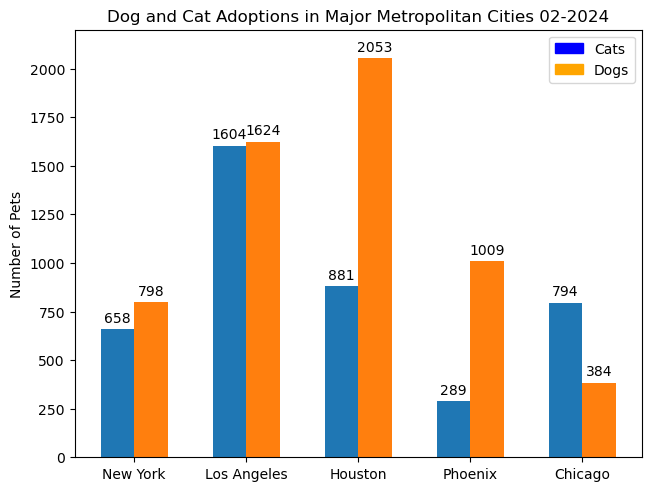

In [7]:
cat_counts = [NYCats, LACats, HoustonCats, PhoenixCats, ChicagoCats]
dog_counts = [NYDogs, LADogs, HoustonDogs, PhoenixDogs, ChicagoDogs]

pet_counts = {"Dogs": cat_counts,
              "Cats": dog_counts}
cities = ["New York", "Los Angeles", "Houston", "Phoenix", "Chicago"]

x = np.arange(len(cities))
width = 0.3
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in pet_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset + 0.15, measurement, width)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('Number of Pets')
ax.set_title('Dog and Cat Adoptions in Major Metropolitan Cities 02-2024')
ax.set_xticks(x + width, cities)
ax.set_ylim(0, 2200)

colors = {'Cats':'Blue','Dogs':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig("../Resources/DogCatCityCounts.png")

plt.show()

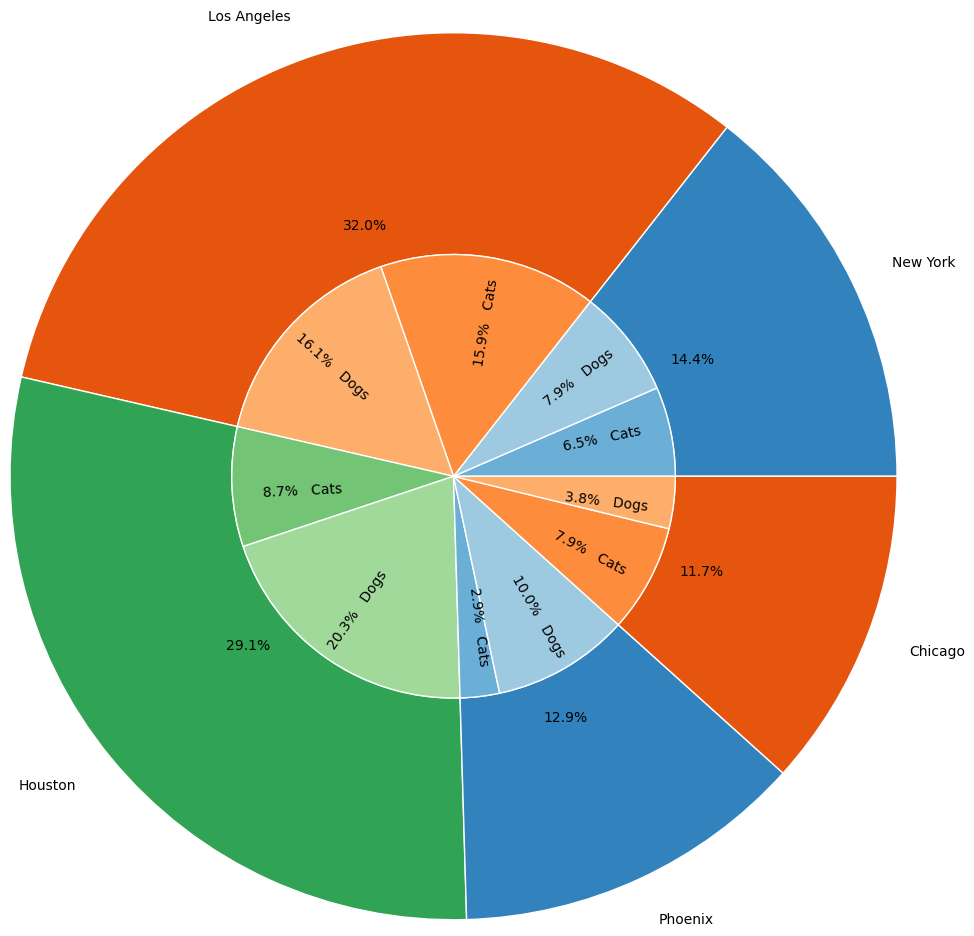

In [10]:
fig, ax = plt.subplots()

size = 1.5
vals = np.array([[NYCats,NYDogs],
                [LACats,LADogs],
                [HoustonCats, HoustonDogs],
                [PhoenixCats,PhoenixDogs],
                [ChicagoCats,ChicagoDogs]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

labels_inner=[f"{NYCatsPercent}%   Cats", f"{NYDogsPercent}%   Dogs",
              f"{LACatsPercent}%   Cats", f"{LADogsPercent}%   Dogs",
              f"{HoustonCatsPercent}%   Cats", f"{HoustonDogsPercent}%   Dogs", 
              f"{PhoenixCatsPercent}%   Cats", f"{PhoenixDogsPercent}%   Dogs",
              f"{ChicagoCatsPercent}%   Cats", f"{ChicagoDogsPercent}%   Dogs"]

labels_outer=["New York", "Los Angeles", "Houston", "Phoenix", "Chicago"]

ax.pie(vals.sum(axis=1), radius=3, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct="%1.1f%%", 
       labels=labels_outer)

ax.pie(vals.flatten(), radius=3-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),
       labels=labels_inner, labeldistance = 0.5, rotatelabels=True)

ax.set(aspect="equal")
plt.savefig("../Resources/DogCatNestedPieChart.", bbox_inches="tight")
plt.show()